#Before We Begin


In [1]:
import matplotlib
import pandas as pd 
import numpy as np
import json
from collections import namedtuple

# making plots
import matplotlib.pyplot as plt
import seaborn as sns

# math + calculations
import datetime
import math
from __future__ import division

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

matplotlib.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

In [2]:
sleepDataFilename = 'data/sleep-score/sleep_score.csv'
sleepScoreData = pd.read_csv(sleepDataFilename, parse_dates=['timestamp'])
sleepScoreData['Night of Sleep'] = sleepScoreData['timestamp'].apply(lambda x: datetime.datetime(x.year, x.month, x.day - 1))
sleepScoreData = sleepScoreData.rename(columns={'timestamp' : 'wakeTime'})

print("Loaded sleep data db successfully")

Loaded sleep data db successfully


In [5]:
sleepScoreData

,sleep_log_entry_id,wakeTime,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Night of Sleep
0,26968388750,2020-04-30 11:25:30,87,23,20,44,92,51,0.105138,2020-04-29
1,26951445347,2020-04-29 09:39:30,82,23,20,39,104,51,0.105904,2020-04-28
2,26938824292,2020-04-28 09:40:30,75,22,20,33,83,51,0.099422,2020-04-27
3,26919181668,2020-04-27 10:07:30,82,22,21,39,71,50,0.096343,2020-04-26
4,26907121992,2020-04-26 10:08:00,80,22,23,35,77,51,0.067729,2020-04-25
5,26894259413,2020-04-25 10:59:30,77,21,23,33,72,53,0.074419,2020-04-24
6,26882282303,2020-04-24 10:36:00,81,23,20,38,109,53,0.108388,2020-04-23
7,26867735249,2020-04-23 10:10:30,68,19,16,33,97,52,0.122631,2020-04-22
8,26855769564,2020-04-22 12:23:00,76,22,14,40,83,49,0.110487,2020-04-21
9,26840994853,2020-04-21 11:12:30,80,23,18,39,90,48,0.091807,2020-04-20


In [8]:
monthDataFilename = 'data/fitbit_export_month.csv'
monthDataFile = open(monthDataFilename, 'r').readlines()

# split data export (month) by type: body data, activity data, sleep data
currentFilename = 'data/body_data_month.csv'
open(currentFilename, 'w+')
for i in range(1, len(monthDataFile)):
    if monthDataFile[i] == "Activities\n":
        currentFilename = 'data/activities_data_month.csv'
        open(currentFilename, 'w+')
    elif monthDataFile[i] == "Sleep\n":
        currentFilename = 'data/sleep_data_month.csv'
        open(currentFilename, 'w+')
    elif monthDataFile[i] != '\n':
        open(currentFilename, 'a').writelines(monthDataFile[i])

In [9]:
sleepSummaryData = pd.read_csv('data/sleep_data_month.csv', parse_dates=['Start Time', 'End Time'])
sleepSummaryData = sleepSummaryData[sleepSummaryData['Minutes Deep Sleep'].notnull()]
sleepSummaryData['Night of Sleep'] = sleepSummaryData['End Time'].apply(lambda x: datetime.datetime(x.year, x.month, x.day - 1))

print("Loaded sleep data monthly summary successfully")

Loaded sleep data monthly summary successfully


In [11]:
# sleepSummaryData

In [12]:
mergedSleepData = pd.merge(sleepScoreData, sleepSummaryData, on=["Night of Sleep"])
mergedSleepData

,sleep_log_entry_id,wakeTime,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Night of Sleep,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,26968388750,2020-04-30 11:25:30,87,23,20,44,92,51,0.105138,2020-04-29,2020-04-30 00:42:00,2020-04-30 11:25:00,548,95,49,643,159.0,296.0,93.0
1,26951445347,2020-04-29 09:39:30,82,23,20,39,104,51,0.105904,2020-04-28,2020-04-29 00:46:00,2020-04-29 09:39:00,450,83,34,533,107.0,239.0,104.0
2,26938824292,2020-04-28 09:40:30,75,22,20,33,83,51,0.099422,2020-04-27,2020-04-28 02:28:00,2020-04-28 09:40:00,361,71,28,432,78.0,200.0,83.0
3,26919181668,2020-04-27 10:07:30,82,22,21,39,71,50,0.096343,2020-04-26,2020-04-27 00:35:00,2020-04-27 10:07:00,477,95,32,572,108.0,298.0,71.0
4,26907121992,2020-04-26 10:08:00,80,22,23,35,77,51,0.067729,2020-04-25,2020-04-26 03:38:00,2020-04-26 10:08:00,338,52,24,390,74.0,187.0,77.0
5,26894259413,2020-04-25 10:59:30,77,21,23,33,72,53,0.074419,2020-04-24,2020-04-25 05:13:00,2020-04-25 10:59:00,294,52,25,346,59.0,163.0,72.0
6,26882282303,2020-04-24 10:36:00,81,23,20,38,109,53,0.108388,2020-04-23,2020-04-24 01:45:00,2020-04-24 10:36:00,438,92,33,530,101.0,227.0,110.0
7,26867735249,2020-04-23 10:10:30,68,19,16,33,97,52,0.122631,2020-04-22,2020-04-23 02:42:00,2020-04-23 10:10:00,374,74,27,448,59.0,218.0,97.0
8,26855769564,2020-04-22 12:23:00,76,22,14,40,83,49,0.110487,2020-04-21,2020-04-22 03:28:00,2020-04-22 12:23:00,466,68,24,534,129.0,254.0,83.0
9,26840994853,2020-04-21 11:12:30,80,23,18,39,90,48,0.091807,2020-04-20,2020-04-21 02:46:00,2020-04-21 11:12:00,424,82,31,506,98.0,236.0,90.0


In [13]:
with open('data/user-site-export/exercise-0.json') as f:
  exerciseDataObj = json.load(f)
# print(json.dumps(exerciseDataObj, indent = 4, sort_keys=True))

In [14]:
activityCSVFilename = "data/exercise_data_month.csv"
open(activityCSVFilename, 'w+')
open(activityCSVFilename, 'a').writelines("Exercise Time, ActivityName, Steps, Duration, Minutes Sedentary, Minutes Lightly Active, Minutes Fairly Active, Minutes Very Active, Average Heart Rate, Calories, Minutes Fat Burn, Minutes Cardio, Minutes Peak\n")

# write all exercise data within this month to csv
for activityDict in exerciseDataObj:
    activityTimeString = activityDict['startTime']
    activityTime = datetime.datetime.strptime(activityDict['startTime'],"%m/%d/%y %H:%M:%S")
    activityTimeLocal = activityTime - datetime.timedelta(hours=4)
    if activityTimeLocal > (datetime.datetime.today() - datetime.timedelta(days=30)):
        selectedDataString = str(activityTimeLocal) + ", " + activityDict['activityName'] + ", " + str(activityDict['steps']) + ", " + str(activityDict['duration']) + ", "
        selectedDataString += str(activityDict['activityLevel'][0]['minutes']) + ", " + str(activityDict['activityLevel'][1]['minutes']) + ", " + str(activityDict['activityLevel'][2]['minutes']) + ", " + str(activityDict['activityLevel'][3]['minutes']) + ", "
        selectedDataString += str(activityDict['averageHeartRate']) + ", " + str(activityDict['calories']) + ", "
        selectedDataString += str(activityDict['heartRateZones'][1]['minutes']) + ", " + str(activityDict['heartRateZones'][2]['minutes']) + ", " + str(activityDict['heartRateZones'][3]['minutes']) + "\n"
        open(activityCSVFilename, 'a').writelines(selectedDataString)
#         print selectedDataString

In [15]:
exerciseData = pd.read_csv('data/exercise_data_month.csv', parse_dates=['Exercise Time'])
exerciseData['Date'] = exerciseData['Exercise Time'].apply(lambda x: datetime.datetime(x.year, x.month, x.day))
exerciseData['Time of Day'] = exerciseData['Exercise Time'].apply(lambda x: x.hour * 60 + x.minute)
# exerciseData

In [16]:
allData = pd.merge(exerciseData, mergedSleepData, left_on=["Date"], right_on=["Night of Sleep"])
allData

,Exercise Time,ActivityName,Steps,Duration,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Average Heart Rate,Calories,Minutes Fat Burn,Minutes Cardio,Minutes Peak,Date,Time of Day,sleep_log_entry_id,wakeTime,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Night of Sleep,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-04-13 22:19:04,Run,4781,2151000,0,0,0,35,164,299,0,3,31,2020-04-13,1339,26737735328,2020-04-14 09:19:00,71,20,20,31,65,60,0.121481,2020-04-13,2020-04-14 03:41:00,2020-04-14 09:19:00,289,48,27,337,53.0,170.0,66.0
1,2020-04-15 18:50:02,Aerobic Workout,1300,1997000,4,19,6,4,98,111,25,1,0,2020-04-15,1130,26774350412,2020-04-16 09:09:00,82,22,23,37,75,55,0.068528,2020-04-15,2020-04-16 02:23:00,2020-04-16 09:09:00,361,45,24,406,77.0,208.0,76.0
2,2020-04-21 01:16:13,Aerobic Workout,769,1075000,2,15,0,0,88,60,10,0,0,2020-04-21,76,26855769564,2020-04-22 12:23:00,76,22,14,40,83,49,0.110487,2020-04-21,2020-04-22 03:28:00,2020-04-22 12:23:00,466,68,24,534,129.0,254.0,83.0
3,2020-04-21 21:39:04,Run,7047,3379000,0,0,2,54,170,514,0,2,49,2020-04-21,1299,26855769564,2020-04-22 12:23:00,76,22,14,40,83,49,0.110487,2020-04-21,2020-04-22 03:28:00,2020-04-22 12:23:00,466,68,24,534,129.0,254.0,83.0
4,2020-04-22 22:44:22,Run,7891,3481000,0,0,0,58,167,532,0,1,54,2020-04-22,1364,26867735249,2020-04-23 10:10:30,68,19,16,33,97,52,0.122631,2020-04-22,2020-04-23 02:42:00,2020-04-23 10:10:00,374,74,27,448,59.0,218.0,97.0
5,2020-04-23 21:11:48,Run,5627,2457000,0,0,0,41,169,388,0,0,41,2020-04-23,1271,26882282303,2020-04-24 10:36:00,81,23,20,38,109,53,0.108388,2020-04-23,2020-04-24 01:45:00,2020-04-24 10:36:00,438,92,33,530,101.0,227.0,110.0
6,2020-04-26 15:51:23,Run,3944,1690000,0,1,1,26,153,229,1,0,14,2020-04-26,951,26919181668,2020-04-27 10:07:30,82,22,21,39,71,50,0.096343,2020-04-26,2020-04-27 00:35:00,2020-04-27 10:07:00,477,95,32,572,108.0,298.0,71.0
7,2020-04-28 16:02:31,Run,3677,1535000,0,0,1,25,162,243,1,2,21,2020-04-28,962,26951445347,2020-04-29 09:39:30,82,23,20,39,104,51,0.105904,2020-04-28,2020-04-29 00:46:00,2020-04-29 09:39:00,450,83,34,533,107.0,239.0,104.0
8,2020-04-29 21:41:43,Run,3174,1331000,0,0,0,22,168,213,0,1,21,2020-04-29,1301,26968388750,2020-04-30 11:25:30,87,23,20,44,92,51,0.105138,2020-04-29,2020-04-30 00:42:00,2020-04-30 11:25:00,548,95,49,643,159.0,296.0,93.0


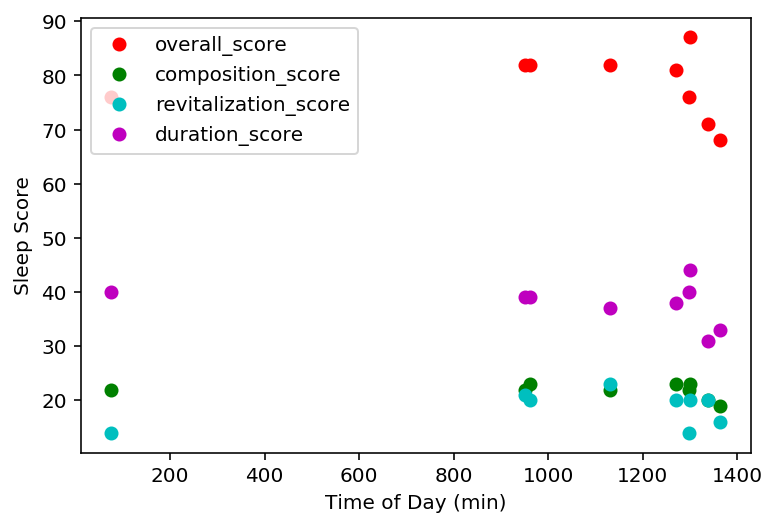

In [17]:
plt.plot(allData['Time of Day'], allData['overall_score'], 'ro')
plt.plot(allData['Time of Day'], allData['composition_score'], 'go')
plt.plot(allData['Time of Day'], allData['revitalization_score'], 'co')
plt.plot(allData['Time of Day'], allData['duration_score'], 'mo')
plt.ylabel("Sleep Score")
plt.xlabel("Time of Day (min)")
plt.legend()
plt.show()

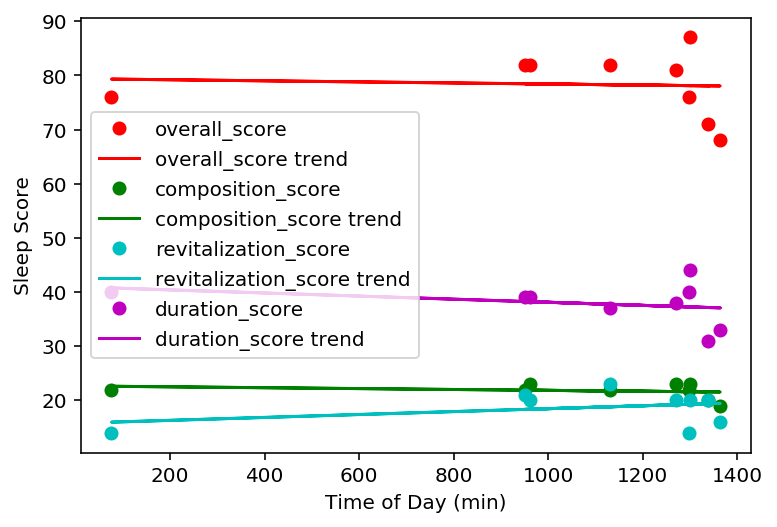

In [18]:
x = allData['Time of Day']
y1 = allData['overall_score']
y2 = allData['composition_score']
y3 = allData['revitalization_score']
y4 = allData['duration_score']

m1, b1 = np.polyfit(x, y1, 1)
m2, b2 = np.polyfit(x, y2, 1)
m3, b3 = np.polyfit(x, y3, 1)
m4, b4 = np.polyfit(x, y4, 1)
plt.plot(x, y1, 'ro')
plt.plot(x, m1*x + b1, 'r', label="overall_score trend")
plt.plot(x, y2, 'go')
plt.plot(x, m2*x + b2, 'g', label="composition_score trend")
plt.plot(x, y3, 'co')
plt.plot(x, m3*x + b3, 'c', label="revitalization_score trend")
plt.plot(x, y4, 'mo')
plt.plot(x, m4*x + b4, 'm', label="duration_score trend")
plt.legend(loc='center left')
plt.ylabel("Sleep Score")
plt.xlabel("Time of Day (min)")
plt.rcParams['figure.figsize'] = [15.0, 12.0]
plt.show()

In [21]:
def plot_heatmap(corrmat, title):
    sns.set(style = "white")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(15, 15))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

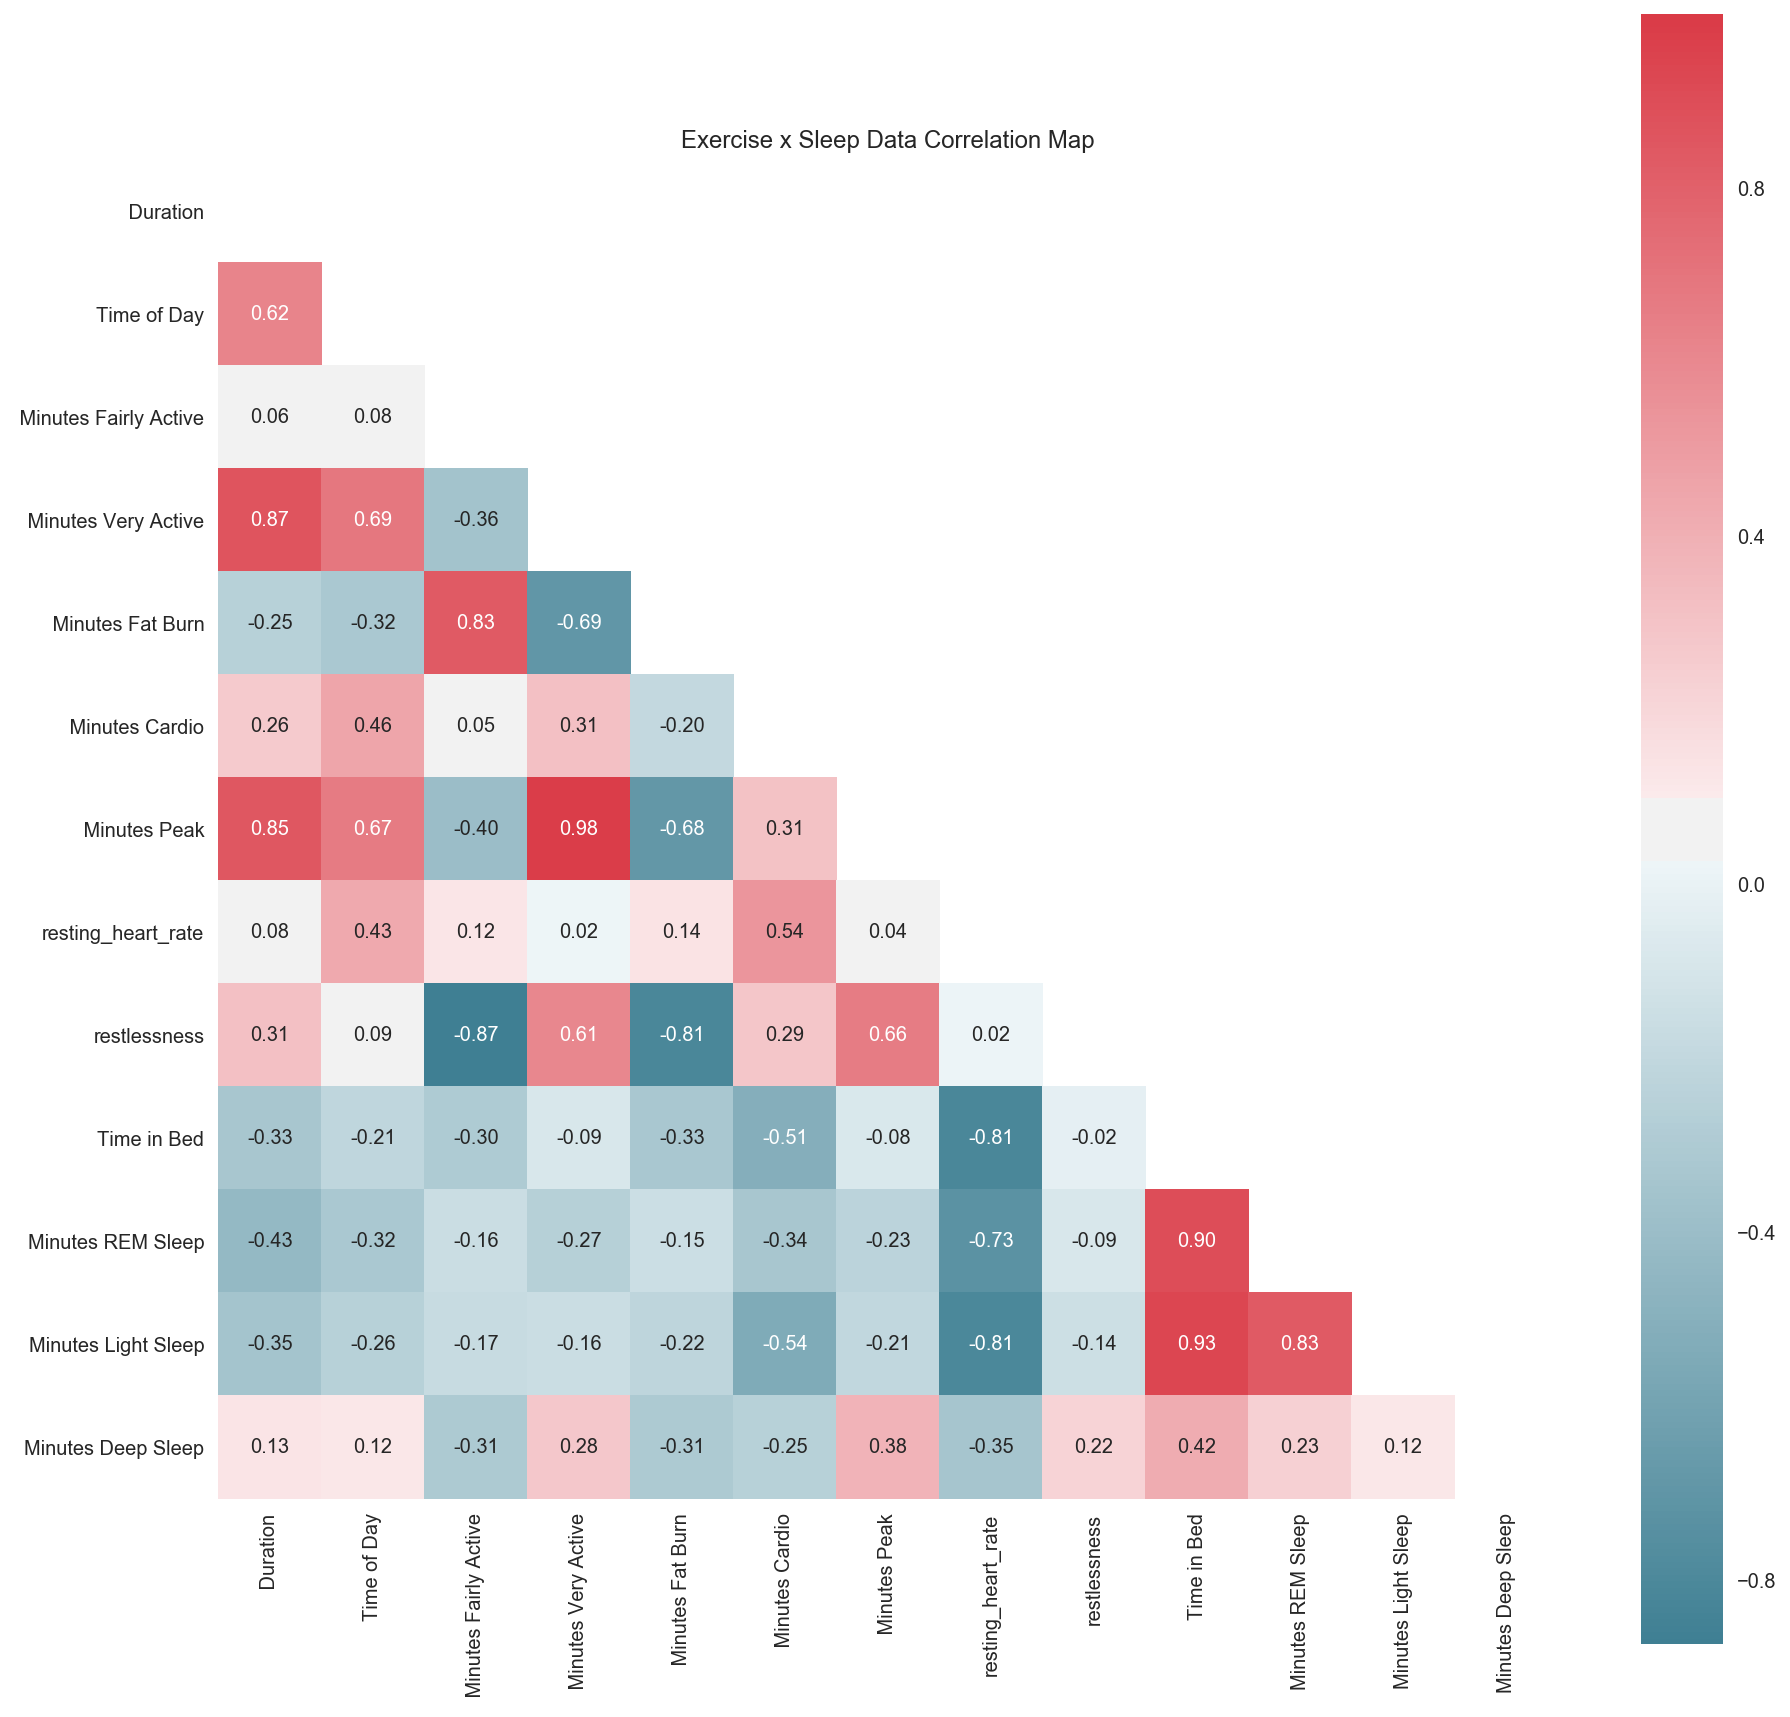

In [22]:
corrdf = allData[[' Duration', 'Time of Day',
                  ' Minutes Fairly Active', ' Minutes Very Active',
                  ' Minutes Fat Burn', ' Minutes Cardio', ' Minutes Peak', 
                  'resting_heart_rate', 'restlessness','Time in Bed', 
                  'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep']]
plot_heatmap(corrdf.corr(), 'Exercise x Sleep Data Correlation Map')

In [ ]:
# allData.keys() # Note: after merge, some keys have a leading space